# FISH - Pipeline - A Python interactive notebook to process FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Notebook summary 


- Load a directory with microscope FISH images
- Establish a connection to Network-attached storage (NAS) using [pysmb](https://github.com/miketeo/pysmb)
- Perform cell segmentation using [Cellpose](https://github.com/MouseLand/cellpose)
- Perform spot detection using [Big-FISH](https://github.com/fish-quant/big-fish)
- Datamanagement using Pandas

----

<img src= /home/luisub/Desktop/FISH_Processing/docs/images/code_architecture.png alt="drawing" width="1000"/>

### Libraries

In [1]:
# Importing libraries
import sys
import pathlib
import warnings
warnings.filterwarnings("ignore")

### Path to source directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')

# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa

In [3]:
fa.Banner().print_banner()

 
FISH processing repository by : 
Luis U. Aguilera, Joshua Cook, Tim Stasevich, and Brian Munsky. 
 ____________________________________________________________  
|                      ,#^^^^^^^%&&&                         | 
|  .&.                 &.           ,&&&___                  | 
|  &  &         ___&&&/                    (&&&&____         | 
|  &    &,____#&                   .       #.       %&**,    | 
|  /(                  &         ,%       &       %     ,&   | 
|    &          &.                       %.      %&%     &*  | 
|     &&         *         .%            &             &(    | 
|   &                &(           ,#     .%             ,.&  | 
|  &    _&&__#&.     &&           &.      ,&         ,%&     | 
|  &  (%        #&,___                      (-***%&%^        | 
|  & &                %&&&(,.      .*#&&&&&%.                | 
|                          &    ,%%%%                        | 
|___________________________/%%^_____________________________| 



----

# Parameters defined by the user 

----

### Paths to images

In [4]:
# Path to credentials
desktop_path = pathlib.Path.home()/'Desktop'
path_to_config_file = desktop_path.joinpath('config.yml')
# Path to images and masks
data_folder_path =pathlib.Path('smFISH_images/Eric_smFISH_images/20220131/DUSP1_Dex_75min')
path_to_masks_dir = None 

In [5]:
download_data_from_NAS = True
send_data_to_NAS = False

### Parameters for segmentation and spot detection

In [6]:
# Parameters fo cell segmentation 
channels_with_cytosol = [2]                  # list or int indicating the channels where the cytosol is detectable. Use None to not segment the cytosol.
channels_with_nucleus = [0]                  # list or int indicating the channels where the nucleus is detectable. Use None to not segment the cytosol.
channels_with_FISH = [1]                     # list or int with the channels with FISH spots that are used for the quantification
diameter_nucleus = 122                       # approximate nucleus size in pixels
diameter_cytosol = 222                       # approximate cytosol size in pixels
voxel_size_z = 500                           # Microscope conversion px to nanometers in the z axis.
voxel_size_yx = 160                          # Microscope conversion px to nanometers in the xy axis.
psf_z = 350                                  # Theoretical size of the PSF emitted by a [rna] spot in the z plan, in nanometers.
psf_yx = 120                                 # Theoretical size of the PSF emitted by a [rna] spot in the yx plan, in nanometers.
minimum_spots_cluster = 3                    # The number of spots in a neighborhood for a point to be considered as a core point (from which a cluster is expanded). This includes the point itself.
show_plots = True                            # Flag to display plots
optimization_segmentation_method =  'z_slice_segmentation' #  # optimization_segmentation_method = 'intensity_segmentation' 'z_slice_segmentation', 'gaussian_filter_segmentation' , 'z_slice_segmentation_marker' , 'center_slice', None
save_all_images=False                        # If true, it shows a all planes for the FISH plot detection. 
threshold_for_spot_detection = None          # Intensity threshold to detect  spots. If None, it will automatically detect the spots. Pass a list if you have more than one FISH channel.
save_filtered_images = False                 # Flag to save images after the gaussian-laplace filter
list_selected_z_slices = None                # [6,7,8,9] # subsection of slices to process.
number_of_images_to_process = 5              # This section allows the user to select a subset of images to process. Use an integer to indicate the n images to process.


## Downloading data from NAS

In [7]:
# Download data from NAS
local_data_dir, masks_dir, _, _, _ = fa.Utilities.read_images_from_folder( path_to_config_file, data_folder_path, 
                                                                        path_to_masks_dir,  download_data_from_NAS)


Connection established
File Downloaded : ROI007_XY1643665132_Z00_T0_C1.tif
File Downloaded : ROI002_XY1643665127_Z00_T0_C1.tif
File Downloaded : ROI025_XY1643667031_Z00_T0_C2.tif
File Downloaded : ROI021_XY1643667027_Z00_T0_C0.tif
File Downloaded : ROI003_XY1643665128_Z00_T0_C1.tif
File Downloaded : ROI005_XY1643665130_Z00_T0_C1.tif
File Downloaded : ROI027_XY1643667033_Z00_T0_C2.tif
File Downloaded : ROI019_XY1643667025_Z00_T0_C2.tif
File Downloaded : ROI023_XY1643667029_Z00_T0_C2.tif
File Downloaded : ROI028_XY1643667034_Z00_T0_C1.tif
File Downloaded : ROI014_XY1643665139_Z00_T0_C0.tif
File Downloaded : ROI016_XY1643667022_Z00_T0_C1.tif
File Downloaded : ROI024_XY1643667030_Z00_T0_C1.tif
File Downloaded : ROI013_XY1643665138_Z00_T0_C1.tif
File Downloaded : ROI008_XY1643665133_Z00_T0_C0.tif
File Downloaded : ROI012_XY1643665137_Z00_T0_C1.tif
File Downloaded : ROI015_XY1643665140_Z00_T0_C2.tif
File Downloaded : ROI009_XY1643665134_Z00_T0_C1.tif
File Downloaded : ROI018_XY1643667024_Z00

## Running the pipeline

----

Folder name:  DUSP1_Dex_75min___nuc_122__cyto_222__psfz_350__psfyx_120__ts_None
 ############### 
       IMAGE : 0
 ############### 
 
ORIGINAL IMAGE
ROI001_XY1643665126_Z00_T0_merged.tif
(27, 936, 640, 3)


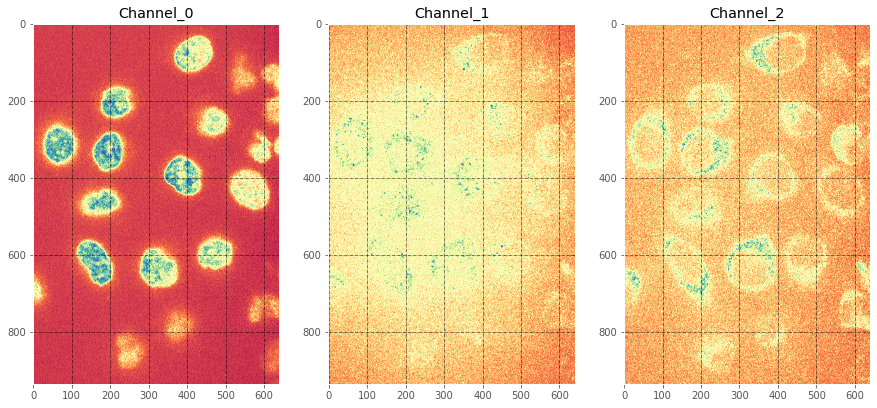

CELL SEGMENTATION


In [8]:
dataframe_FISH,_,_,_,output_identification_string = fa.PipelineFISH(local_data_dir, channels_with_cytosol, channels_with_nucleus, channels_with_FISH,diameter_nucleus, 
                                       diameter_cytosol, minimum_spots_cluster, masks_dir=masks_dir,  voxel_size_z=voxel_size_z,
                                       voxel_size_yx=voxel_size_yx ,psf_z=psf_z,psf_yx=psf_yx, show_plots=show_plots,  
                                       file_name_str =data_folder_path.name, optimization_segmentation_method = optimization_segmentation_method,
                                       save_all_images=save_all_images,threshold_for_spot_detection=threshold_for_spot_detection,save_filtered_images=save_filtered_images,
                                       number_of_images_to_process=number_of_images_to_process).run()

## Extracting data from the dataframe

----

In [ ]:
# Be aware that the code keeps track of cells without spots. In the data frame, the fields for cells without spots are populated with -1 values.
#dataframe_FISH.head()

In [ ]:
# Number of cells
spot_type_selected = 0
number_of_spots_per_cell, number_of_spots_per_cell_cytosol, number_of_spots_per_cell_nucleus, number_of_TS_per_cell, ts_size, cell_size, number_cells, nuc_size, cyto_size = fa.Utilities.dataframe_extract_data(dataframe_FISH,spot_type_selected,minimum_spots_cluster)


## Plots

In [ ]:
# Plots
file_plots_distributions = fa.Plots.plotting_results_as_distributions(number_of_spots_per_cell, number_of_spots_per_cell_cytosol, number_of_spots_per_cell_nucleus, ts_size, number_of_TS_per_cell, minimum_spots_cluster, output_identification_string=output_identification_string)


In [ ]:
file_plots_cell_size_vs_num_spots = fa.Plots.plot_cell_size_spots(channels_with_cytosol, channels_with_nucleus, cell_size, number_of_spots_per_cell, cyto_size, number_of_spots_per_cell_cytosol, nuc_size, number_of_spots_per_cell_nucleus,output_identification_string=output_identification_string)


In [ ]:
file_plots_cell_intensity_vs_num_spots = fa.Plots.plot_cell_intensity_spots(dataframe_FISH, number_of_spots_per_cell_nucleus, number_of_spots_per_cell_cytosol,output_identification_string)


In [ ]:
file_plots_bleedthru = fa.Plots.plot_scatter_bleedthru(dataframe_FISH, channels_with_cytosol, channels_with_nucleus,output_identification_string)


In [ ]:
file_plots_spot_intensity_distributions = fa.Plots.plot_spot_intensity_distributions(dataframe_FISH,output_identification_string)


## Saving data

In [ ]:
# Saving data and plots, and sending data to NAS
fa.Utilities.save_output_to_folder(output_identification_string, data_folder_path, file_plots_distributions, file_plots_cell_size_vs_num_spots, file_plots_cell_intensity_vs_num_spots, file_plots_bleedthru, file_plots_spot_intensity_distributions )
analysis_folder_name, mask_dir_complete_name = fa.Utilities.sending_data_to_NAS(output_identification_string, data_folder_path, path_to_config_file, path_to_masks_dir, diameter_nucleus, diameter_cytosol, send_data_to_NAS, masks_dir)
fa.Utilities.move_results_to_analyses_folder( output_identification_string, data_folder_path, mask_dir_complete_name, path_to_masks_dir, save_filtered_images, download_data_from_NAS )